In [1]:
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals
import sys, platform, os

import numpy as np
import pandas as pd
import scipy.integrate
from scipy import interpolate
import scipy.optimize as optimization
import scipy.stats
import scipy.special
import csv

# Import pyplot for plotting
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_formats = {'svg',}



In [2]:
'''Import Camb Power Spectrum'''
data1 = pd.read_table('/Users/luizcouto/CAMB-May2016/halo2_matterpower.dat', delim_whitespace=True)
data1.columns = ('kh','P','n')
data1[:3]

,kh,P,n
0,0.000100,703.15,NaN
1,0.000102,716.77,NaN
2,0.000104,730.65,NaN


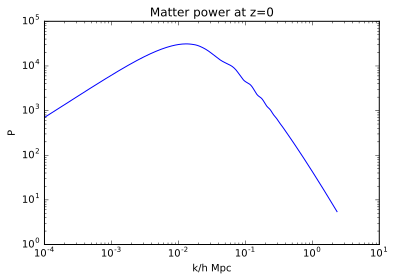

In [3]:
# Making plot of the imported spectrum
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(data1.kh, data1.P,         
         linestyle='-',                    
         linewidth=1)
ax.set_title('Matter power at z=0')
ax.set_xlabel('k/h Mpc')
ax.set_ylabel('P')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.annotate('$X_n = 0.1512$', xy=(1, 1), xytext=(40, 0.15))
# ax.invert_xaxis()
# ax.legend(['$\Omega_m = 1$', '$\Omega_{DE} = 0.99, \Omega_m = 0.01$', '$\Omega_{K} = 0.99, \Omega_m = 0.01$'],loc='lower left')
plt.show()
# fig1.savefig('solucao1_1.pdf')

In [4]:
'''Defining the k*W(kR) function'''
def W(k,R):
    f = (3/(k*(R**2)))*(((np.sin(k*R))/(k*R)) - np.cos(k*R))
    return f

In [5]:
filtered = data1
filtered[:2]

,kh,P,n
0,0.000100,703.15,NaN
1,0.000102,716.77,NaN


In [6]:
''' Calculates the integral for sigma^2_R for each value of R '''
F = filtered.P * (W(filtered.kh,0.01)**2)
integral1 = np.array(scipy.integrate.simps(F,filtered.kh))
for R in np.arange(0.02, 100, 0.01):
    Wf = W(filtered.kh,R)
    F = filtered.P * (Wf**2)
    integral1 = np.append(integral1, scipy.integrate.simps(F,filtered.kh))

In [7]:
sigma = np.sqrt(integral1/(2*(np.pi**2)))
R = np.linspace(0.01, 100, num=9999)

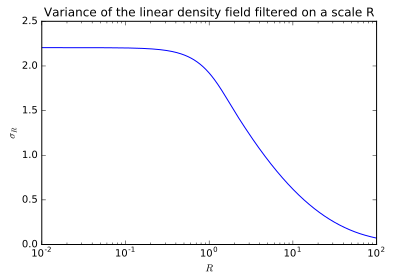

In [8]:
# Making plot
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.plot(R, sigma,       
         linestyle='-',                    
         linewidth=1)
ax.set_title('Variance of the linear density field filtered on a scale R')
ax.set_xlabel('$R$')
ax.set_ylabel('$\sigma_R$')
# ax.set_yscale('log')
ax.set_xscale('log')
# ax.annotate('$X_n = 0.1512$', xy=(1, 1), xytext=(40, 0.15))
# ax.invert_xaxis()
# ax.legend(['$\Omega_m  = 0.25, \Omega_{DE} = 0.75, \Omega_k = \Omega_r = 0 ,w=1\,$'])
plt.show()
# fig2.savefig('solucao3_1.pdf')

In [9]:
print('sigma_8(calc) =',sigma[799])
print('sigma_8(CAMB) = 0.7168')

sigma_8(calc) = 0.717457780887
sigma_8(CAMB) = 0.7168


Calculating the growth function

In [10]:
""" Introducing and calculating some cosmological constants """
# Hubble Constant
H0 = 1
# Omega_m
Omega_m = 0.23
# Omega_DE
Omega_DE = 0.77

In [11]:
'''Defining H'''
def H(a, omegam, omegade):
    f = H0*(((1-omegam-omegade)*(a**(-2)))+(omegam*(a**(-3)))+omegade)**(1/2)
    return f

In [12]:
""" Numerical Solution of the First Oder Differential Equation Using Euler's Method """
# Setting the step size 
h = 0.001
# Setting the initial condition on an & tn
un = 0.001
an = 0.001
omegam = Omega_m
omegade = Omega_DE
# Creating arrays to save and plot the results
u2 = np.array([an])
a2 = np.array([an])
# Loop responsible for the numerical calculation
while (an < 1):
    un = un + h*(((5/2)*(H0**2)*omegam)*(1/((an**3)*((H(an,omegam,omegade))**3))))
    an = an + h
    u2 = np.append([u2],[un])
    a2 = np.append([a2],[an])
z2 = (1/a2)-1

In [13]:
'''Evaluating the Growth Function'''
growth2 = u2 * H(a2,Omega_m,Omega_DE)

In [14]:
'''Defining the function to be integrated'''
def func(a, omegam, omegade):
    f = 1/((a*(H(a,omegam,omegade)/H0))**3)
    return f

In [15]:
''' Defining the ragnge of integration '''
a = np.linspace(0.00001, 1.0, 10000)
zint2 = (1/a)-1

In [16]:
'''Defining the vector with the function points to be integrated'''
omegam = Omega_m
omegade = Omega_DE
ui2 = func(a, omegam, omegade)

'''Evaluating the Integral'''
integral2 = scipy.integrate.cumtrapz(ui2,a,initial = 0)

'''Evaluating the Growth Function'''
growthint2 = integral2 * (5/2) * omegam * (H(a,omegam,omegade)/H0) 

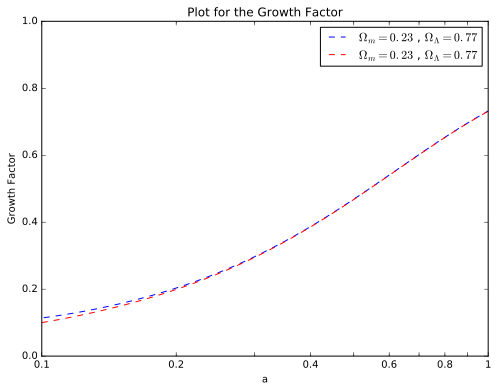

In [17]:
# Making plot
fig3 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig3.add_subplot(111)
# ax.plot(a1[100:], growth1[100:],'b',label='$\Omega_m = 1$ , $\Omega_{\Lambda} = 0$')
ax.plot(a2[100:], growth2[100:],'b--',label='$\Omega_m = 0.23$ , $\Omega_{\Lambda} = 0.77$')
# ax.plot(a3[100:], growth3[100:],'b-.',label='$\Omega_m = 0.3$ , $\Omega_{\Lambda} = 0$')
# ax.plot(a[1000:], growthint1[1000:],'r',label='$\Omega_m = 1$ , $\Omega_{\Lambda} = 0$')
ax.plot(a[1000:], growthint2[1000:],'r--',label='$\Omega_m = 0.23$ , $\Omega_{\Lambda} = 0.77$')
# ax.plot(a[1000:], growthint3[1000:],'r-.',label='$\Omega_m = 0.3$ , $\Omega_{\Lambda} = 0$')
ax.set_title('Plot for the Growth Factor')
ax.set_xlabel('a')
ax.set_ylabel('Growth Factor')
# ax.set_yscale('log')
ax.set_xscale('log')
ax.xaxis.set_ticks(np.arange(0.1, 1.1, 0.1))
ax.xaxis.set_ticklabels([0.1, 0.2, ' ' , 0.4, ' ' , 0.6, ' ', 0.8,  ' ', 1])
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.2))
# ax.annotate('$X_n = 0.1512$', xy=(1, 1), xytext=(40, 0.15))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
# fig3.savefig('solucao_EDO.pdf')

In [18]:
'''Interpolating function'''
zinter2 = zint2
growthinter2 = growthint2
zinter2, growthinter2 = zip(*sorted(zip(zinter2, growthinter2)))
Dz = scipy.interpolate.splrep(zinter2, growthinter2,s=0)

In [19]:
'''Testing the interpolating function'''
xnew4 = np.linspace(0, 9, 1e4)
ynew4 = interpolate.splev(xnew4, Dz, der=0)

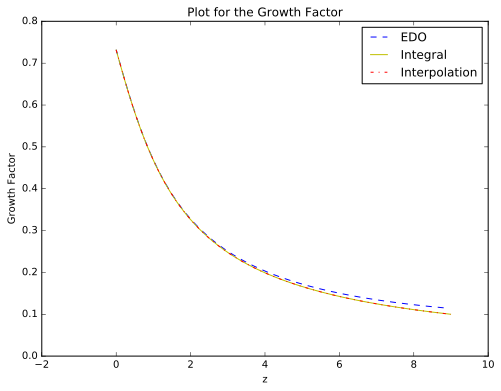

In [20]:
# Making plot
fig4 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig4.add_subplot(111)
ax.plot(z2[101:], growth2[101:],'b--',label='EDO')
ax.plot(zint2[1001:], growthint2[1001:],'y-',label='Integral')
ax.plot(xnew4, ynew4,'r-.',label='Interpolation')
ax.set_title('Plot for the Growth Factor')
ax.set_xlabel('z')
ax.set_ylabel('Growth Factor')
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.xaxis.set_ticks(np.arange(0.1, 1.1, 0.1))
# ax.xaxis.set_ticklabels([0.1, 0.2, ' ' , 0.4, ' ' , 0.6, ' ', 0.8,  ' ', 1])
# ax.yaxis.set_ticks(np.arange(0, 1.1, 0.2))
# ax.annotate('$X_n = 0.1512$', xy=(1, 1), xytext=(40, 0.15))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
# fig4.savefig('solucao_EDO.pdf')

In [21]:
''' Position of z=0 and z=1 '''
print('z =', xnew4[0], '=> D(0) =', ynew4[0])
print('z =', xnew4[1111], '=> D(1) =', ynew4[1111])

z = 0.0 => D(0) = 0.731437003502
z = 1.0 => D(1) = 0.467961483772


In [22]:
''' Introducing the necessary values for D(z) = Dz '''
D0 = ynew4[0] / ynew4[0]
D1 = ynew4[1111] / ynew4[0]

In [23]:
rho_m = Omega_m * 2.775035823e11
sigma = D0 * np.sqrt(integral1/(2*(np.pi**2)))
sigma1 = D1 * np.sqrt(integral1/(2*(np.pi**2)))
R = np.linspace(0.01, 200, num=19999)
M = (4/3)*np.pi*(R**3)*rho_m 
M[155:3345]

array([  1.01513445e+12,   1.03478168e+12,   1.05468079e+12, ...,
         9.98985762e+15,   9.99882518e+15,   1.00077981e+16])

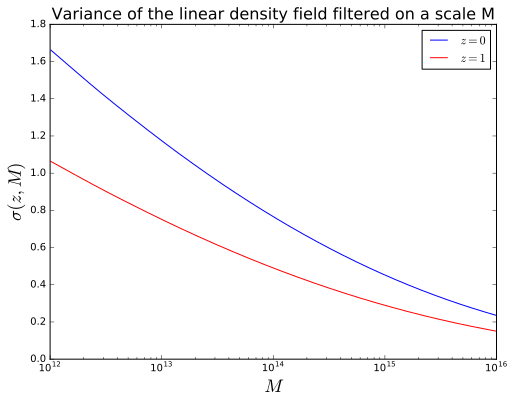

In [24]:
# Making plot
fig5 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig5.add_subplot(111)
ax.plot(M[155:3344], sigma[155:3344],'b-',label='$z = 0$')
ax.plot(M[155:3344], sigma1[155:3344],'r-',label='$z = 1$')
ax.set_title('Variance of the linear density field filtered on a scale M', fontsize=16)
ax.set_xlabel('$M$', fontsize=18)
ax.set_ylabel('$\sigma(z,M)$', fontsize=18)
# ax.set_yscale('log')
ax.set_xscale('log')
# ax.annotate('($M, \delta_c$) = ($1.375\\times 10^{12}$, $1.686$)', 
#             xy=(1375670000000, 1.686), xytext=(5000000000000, 1.7),
#             arrowprops=dict(facecolor='black', shrink=0.05, width=2))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
# fig5.savefig('solucao1_a.pdf')

In [25]:
print(sigma[150])
M[150:151]
delta_c = 1.686
print('z = 0 , M =', M[150:151],', delta_c =', delta_c)

1.68329800476
z = 0 , M = [  9.20620409e+11] , delta_c = 1.686


In [26]:
'''Interpolating function'''
sigmaz0 = scipy.interpolate.splrep(M[155:3344], sigma[155:3344],s=0)

In [27]:
'''Testing the interpolating function'''
xnew = np.linspace(1e12, 1e16, 2e4)
ynew = interpolate.splev(xnew, sigmaz0, der=0)

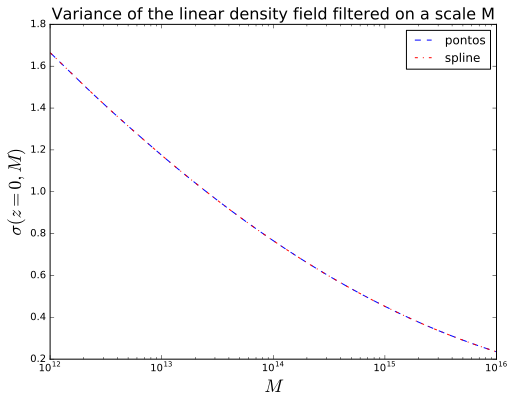

In [28]:
# Making plot
fig6 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig6.add_subplot(111)
ax.plot(M[155:3344], sigma[155:3344],'b--',label='pontos')
ax.plot(xnew, ynew,'r-.',label='spline')
ax.set_title('Variance of the linear density field filtered on a scale M', fontsize=16)
ax.set_xlabel('$M$', fontsize=18)
ax.set_ylabel('$\sigma(z=0,M)$', fontsize=18)
# ax.set_yscale('log')
ax.set_xscale('log')
# ax.annotate('($M, \delta_c$) = ($1.375\\times 10^{12}$, $1.686$)', 
#             xy=(1375670000000, 1.686), xytext=(5000000000000, 1.7),
#             arrowprops=dict(facecolor='black', shrink=0.05, width=2))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
# fig6.savefig('solucao1_a.pdf')

(b)

In [29]:
''' Calculating the derivative d(sigma)/d(M) ''' 
sigma2 = sigma[155:3344]
sigma3 = sigma1[155:3344]
M2 = M[155:3344]

dsigma = np.zeros(sigma2.shape,np.float)
dsigma[0:-1] = np.diff(sigma2)/np.diff(M2)
dsigma[-1] = (sigma2[-1] - sigma2[-2])/(M2[-1] - M2[-2])

dsigma3 = np.zeros(sigma3.shape,np.float)
dsigma3[0:-1] = np.diff(sigma3)/np.diff(M2)
dsigma3[-1] = (sigma3[-1] - sigma3[-2])/(M2[-1] - M2[-2])

In [30]:
''' Computing the derivative d[ln(sigma^{-1})]/d[ln(M)] ''' 
d_ln_sigma_d_ln_M = -(M2/sigma2)*dsigma
d_ln_sigma_d_ln_M3 = -(M2/sigma3)*dsigma3

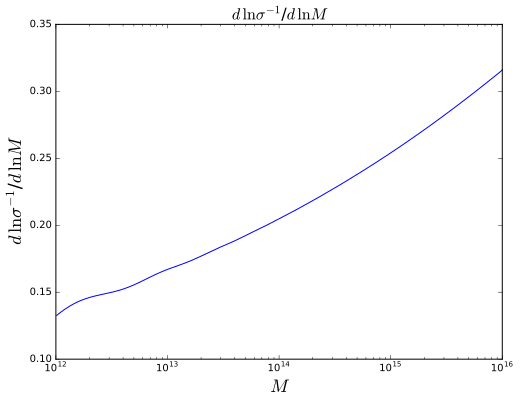

In [31]:
# Making plot
fig7 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig7.add_subplot(111)
ax.plot(M2, d_ln_sigma_d_ln_M,'b-',label='z=0')
# ax.plot(M2, d_ln_sigma_d_ln_M3,'r--',label='z=1')
ax.set_title('$d \, \ln \sigma^{-1}$/$d \, \ln M$', fontsize=16)
ax.set_xlabel('$M$', fontsize=18)
ax.set_ylabel('$d \, \ln \sigma^{-1}$/$d \, \ln M$', fontsize=18)
# ax.set_yscale('log')
ax.set_xscale('log')
# ax.annotate('($M, \delta_c$) = ($1.375\\times 10^{12}$, $1.686$)', 
#             xy=(1375670000000, 1.686), xytext=(5000000000000, 1.7),
#             arrowprops=dict(facecolor='black', shrink=0.05, width=2))
# ax.invert_xaxis()
# ax.legend(loc='best')
plt.show()
# fig7.savefig('solucao1_b.pdf')

In [32]:
'''Interpolating function'''
dlnsigma = scipy.interpolate.splrep(M2, d_ln_sigma_d_ln_M,s=0)

In [33]:
'''Testing the interpolating function'''
xnew2 = np.linspace(1e12, 1e16, 2e4)
ynew2 = interpolate.splev(xnew2, dlnsigma, der=0)

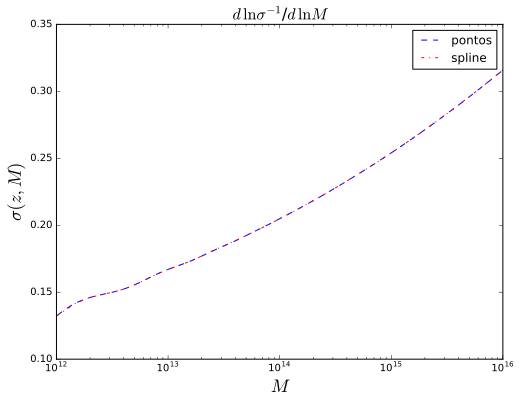

In [34]:
# Making plot
fig8 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig8.add_subplot(111)
ax.plot(M2, d_ln_sigma_d_ln_M,'b--',label='pontos')
ax.plot(xnew2, ynew2,'r-.',label='spline')
ax.set_title('$d \, \ln \sigma^{-1}$/$d \, \ln M$', fontsize=16)
ax.set_xlabel('$M$', fontsize=18)
ax.set_ylabel('$\sigma(z,M)$', fontsize=18)
# ax.set_yscale('log')
ax.set_xscale('log')
# ax.annotate('($M, \delta_c$) = ($1.375\\times 10^{12}$, $1.686$)', 
#             xy=(1375670000000, 1.686), xytext=(5000000000000, 1.7),
#             arrowprops=dict(facecolor='black', shrink=0.05, width=2))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
# fig8.savefig('solucao1_b.pdf')

(c)

In [35]:
'''Defining the fit function'''
def fit(sigma):
    B = 0.494
    d = 2.30 
    e = 0.93
    f = 0.48
    g = 1.403
    F = B*(((sigma/e)**(-d))+((sigma)**(-f)))*np.exp(-g/(sigma**2))
    return F

In [36]:
''' Calculating dn/d[ln(M)] '''
dn_d_ln_M1 = fit(sigma2)*(rho_m/M2)*d_ln_sigma_d_ln_M
dn_d_ln_M3 = fit(sigma3)*(rho_m/M2)*d_ln_sigma_d_ln_M3

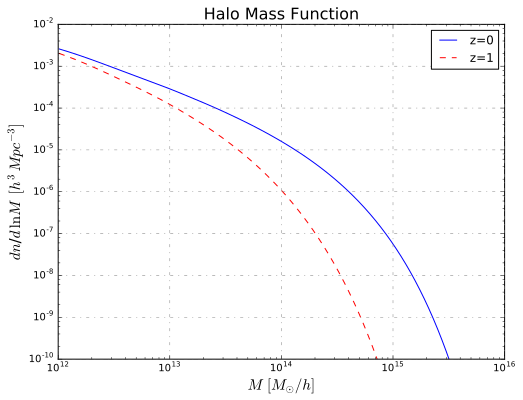

In [37]:
# Making plot
fig9 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig9.add_subplot(111)
ax.plot(M2, dn_d_ln_M1,'b-',label='z=0')
ax.plot(M2, dn_d_ln_M3,'r--',label='z=1')
ax.set_title('Halo Mass Function', fontsize=16)
ax.set_xlabel('$M$ $[M_{\odot}/h]$', fontsize=15)
ax.set_ylabel('$dn$/$d \, \ln M$ $\, [h^3 \, Mpc^{-3}]$', fontsize=15)
ax.set_yscale('log')
ax.set_ylim(1e-10,1e-2)
ax.set_xscale('log')
ax.grid(b=True, which='major', color='grey', linestyle='-.')
# ax.grid(b=True, which='minor', color='k', linestyle='-.')
# ax.annotate('($M, \delta_c$) = ($1.375\\times 10^{12}$, $1.686$)', 
#             xy=(1375670000000, 1.686), xytext=(5000000000000, 1.7),
#             arrowprops=dict(facecolor='black', shrink=0.05, width=2))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
fig9.savefig('halo_mass.pdf')

In [38]:
'''Interpolating function'''
dndlnM = scipy.interpolate.splrep(M2, dn_d_ln_M1,s=0)

In [39]:
# ''' Exporting M2, sigma2 '''
# np.savetxt("sigma2.txt", zip(M2, sigma2), delimiter=",")

In [40]:
'''Calculating P(k,z=1)'''
Pk1_calc = data1.P * (D1/D0)**2

'''Import Camb Power Spectrum at z=1'''
data1z1 = pd.read_table('/Users/luizcouto/CAMB-May2016/halo2z1_matterpower.dat', delim_whitespace=True)
data1z1.columns = ('kh','P','n')
data1z1[:3]

,kh,P,n
0,0.000100,287.47,NaN
1,0.000102,293.04,NaN
2,0.000104,298.71,NaN


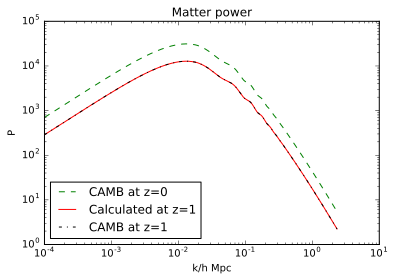

In [41]:
# Making plot of the power spectrum at z=1
fig10 = plt.figure()
ax = fig10.add_subplot(111)
ax.plot(data1.kh, data1.P,'g--',label='CAMB at z=0')
ax.plot(data1.kh, Pk1_calc,'r-',label='Calculated at z=1')
ax.plot(data1z1.kh, data1z1.P,'k-.',label='CAMB at z=1')
ax.set_title('Matter power')
ax.set_xlabel('k/h Mpc')
ax.set_ylabel('P')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.annotate('$X_n = 0.1512$', xy=(1, 1), xytext=(40, 0.15))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
fig10.savefig('matter_power.pdf')

In [108]:
'''Defining the Halo Bias function'''
def bias(nu):
    Delta = 400
    y = np.log10(Delta)
    A = 1.0 + (0.24*y*np.exp(-((4/y)**4)))
    a = (0.44*y) - 0.88
    B = 0.183
    b = 1.5
    C = 0.019 + (0.107*y) + (0.19*np.exp(-((4/y)**4)))
    c = 2.4
    F = 1-(A*((nu**a)/((nu**a)+(delta_c**a))))+(B*(nu**b))+(C*(nu**c))
    return F

In [43]:
''' Computing the halo bias '''
nu_z0 = delta_c/sigma2
nu_z1 = delta_c/sigma3
bias_z0 = bias(nu_z0)
bias_z1 = bias(nu_z1)

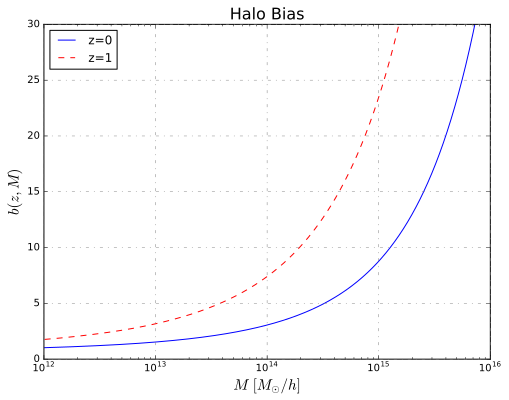

In [44]:
# Making plot
fig11 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig11.add_subplot(111)
ax.plot(M2, bias_z0,'b-',label='z=0')
ax.plot(M2, bias_z1,'r--',label='z=1')
ax.set_title('Halo Bias', fontsize=16)
ax.set_xlabel('$M$ $[M_{\odot}/h]$', fontsize=15)
ax.set_ylabel('$b(z,M)$', fontsize=15)
# ax.set_yscale('log')
ax.set_ylim(0,30)
ax.set_xscale('log')
ax.grid(b=True, which='major', color='grey', linestyle='-.')
# ax.grid(b=True, which='minor', color='k', linestyle='-.')
# ax.annotate('($M, \delta_c$) = ($1.375\\times 10^{12}$, $1.686$)', 
#             xy=(1375670000000, 1.686), xytext=(5000000000000, 1.7),
#             arrowprops=dict(facecolor='black', shrink=0.05, width=2))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
fig11.savefig('halo_bias.pdf')

In [45]:
'''Halo Profile Real Space'''
# Defining the E^2 function
def E2(z):
    F = (Omega_m*((1+z)**3))+Omega_DE
    return F
# rho critical at redshift zero
rho_crit0 = 2.775e11
# Defining the rho_crit(z) function    
def rho_crit(z):
    F = rho_crit0*E2(z)
    return F
# Defining the w_m(z) function    
def w_m(z):
    F = (Omega_m*((1+z)**3))/E2(z)
    return F
# Defining the x(z) function    
def x1(z):
    F = w_m(z)-1
    return F
# Defining the Delta_c(x) function    
def Delta_c(z):
    F = (18*((np.pi)**2))+(82*x1(z))-(39*((x1(z))**2))
    return F
# Defining the function to calculate r_vir
def r_vir(M,z):
    F = ((3*M)/((rho_crit(z))*4*(np.pi)*(Delta_c(z))))**(1/3)
    return F
# M* z=0
M_star0 = 9.20620409e+11
# Defining the function to calculate c(M_vir,z)
def c(M,z):
    F = (9/(1+z))*((M/(M_star0))**(-0.13))
    return F
# Defining the function to calculate rho_s(M_vir,z)
def rho_s(M,z):
    F = M/(4*np.pi*(((r_vir(M,z))**3)/((c(M,z))**3))*((np.log(1+c(M,z)))-((c(M,z))/(1+(c(M,z))))))
    return F
# Defining the function to calculate rho_r(r|M_vir,z)
def rho_r(r,M,z):
    F = (rho_s(M,z))/((((c(M,z))*r)/(r_vir(M,z)))*((1+(((c(M,z))*r)/(r_vir(M,z))))**2))
    return F

In [46]:
'''Calculating Halo Profile Real Space'''

r = np.linspace(1e-2, 1e2, 2e4)
# Mvir = 10^14; z=0
rho140 = rho_r(r,1e14,0)
# Mvir = 10^14; z=1
rho141 = rho_r(r,1e14,1)
# Mvir = 10^15; z=0
rho150 = rho_r(r,1e15,0)
# Mvir = 10^15; z=1
rho151 = rho_r(r,1e15,1)

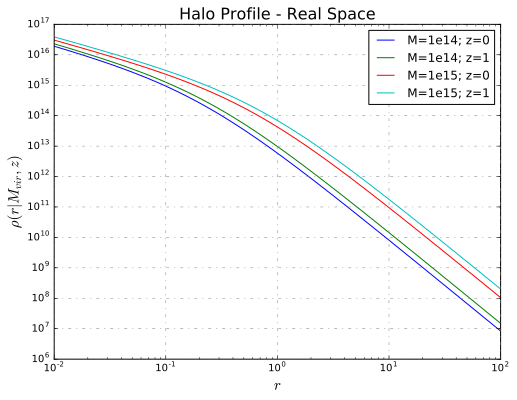

In [47]:
# Making plot
fig12 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig12.add_subplot(111)
ax.plot(r, rho140,label='M=1e14; z=0')
ax.plot(r, rho141,label='M=1e14; z=1')
ax.plot(r, rho150,label='M=1e15; z=0')
ax.plot(r, rho151,label='M=1e15; z=1')
ax.set_title('Halo Profile - Real Space', fontsize=16)
ax.set_xlabel('$r$', fontsize=15)
ax.set_ylabel('$\\rho(r|M_{vir},z)$', fontsize=15)
ax.set_yscale('log')
# ax.set_ylim(0,30)
ax.set_xscale('log')
ax.grid(b=True, which='major', color='grey', linestyle='-.')
# ax.grid(b=True, which='minor', color='k', linestyle='-.')
# ax.annotate('($M, \delta_c$) = ($1.375\\times 10^{12}$, $1.686$)', 
#             xy=(1375670000000, 1.686), xytext=(5000000000000, 1.7),
#             arrowprops=dict(facecolor='black', shrink=0.05, width=2))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
fig12.savefig('halo_profile_real.pdf')

In [48]:
# '''Calculating Halo Profile Fourier Space'''
# # For z=0 and M_vir=10^10
# z=0
# M=1e10
# r = np.linspace(0.001,r_vir(M,z),2e4)
# k = 0.01
# k10 = np.array(k)
# int10 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
# integral10 = np.array(scipy.integrate.simps(int10,r))
# for k in np.logspace(-2, 4, num=1e4):
#     int10 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
#     integral10 = np.append(integral10, scipy.integrate.simps(int10,r))
#     k10 = np.append(k10,k)

In [49]:
# '''Calculating Halo Profile Fourier Space'''
# # For z=0 and M_vir=10^11
# z=0
# M=1e11
# r = np.linspace(0.001,r_vir(M,z),2e4)
# k = 0.01
# k11 = np.array(k)
# int11 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
# integral11 = np.array(scipy.integrate.simps(int11,r))
# for k in np.logspace(-2, 4, num=1e4):
#     int11 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
#     integral11 = np.append(integral11, scipy.integrate.simps(int11,r))
#     k11 = np.append(k11,k)

In [50]:
# '''Calculating Halo Profile Fourier Space'''
# # For z=0 and M_vir=10^12
# z=0
# M=1e12
# r = np.linspace(0.001,r_vir(M,z),2e4)
# k = 0.01
# k12 = np.array(k)
# int12 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
# integral12 = np.array(scipy.integrate.simps(int12,r))
# for k in np.logspace(-2, 4, num=1e4):
#     int12 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
#     integral12 = np.append(integral12, scipy.integrate.simps(int12,r))
#     k12 = np.append(k12,k)

In [51]:
# '''Calculating Halo Profile Fourier Space'''
# # For z=0 and M_vir=10^13
# z=0
# M=1e13
# r = np.linspace(0.001,r_vir(M,z),2e4)
# k = 0.01
# k13 = np.array(k)
# int13 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
# integral13 = np.array(scipy.integrate.simps(int13,r))
# for k in np.logspace(-2, 4, num=1e4):
#     int13 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
#     integral13 = np.append(integral13, scipy.integrate.simps(int13,r))
#     k13 = np.append(k13,k)

In [52]:
# '''Calculating Halo Profile Fourier Space'''
# # For z=0 and M_vir=10^14
# z=0
# M=1e14
# r = np.linspace(0.001,r_vir(M,z),2e4)
# k = 0.01
# k14 = np.array(k)
# int14 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
# integral14 = np.array(scipy.integrate.simps(int14,r))
# for k in np.logspace(-2, 4, num=1e4):
#     int14 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
#     integral14 = np.append(integral14, scipy.integrate.simps(int14,r))
#     k14 = np.append(k14,k)

In [53]:
# '''Calculating Halo Profile Fourier Space'''
# # For z=0 and M_vir=10^15
# z=0
# M=1e15
# r = np.linspace(0.001,r_vir(M,z),2e4)
# k = 0.01
# k15 = np.array(k)
# int15 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
# integral15 = np.array(scipy.integrate.simps(int15,r))
# for k in np.logspace(-2, 4, num=1e4):
#     int15 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
#     integral15 = np.append(integral15, scipy.integrate.simps(int15,r))
#     k15 = np.append(k15,k)

In [54]:
# '''Calculating Halo Profile Fourier Space'''
# # For z=0 and M_vir=10^16
# z=0
# M=1e16
# r = np.linspace(0.001,r_vir(M,z),2e4)
# k = 0.01
# k16 = np.array(k)
# int16 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
# integral16 = np.array(scipy.integrate.simps(int16,r))
# for k in np.logspace(-2, 4, num=1e4):
#     int16 = 4*np.pi*(r**2)*((np.sin(k*r))/(k*r))*((rho_r(r,M,z))/M)
#     integral16 = np.append(integral16, scipy.integrate.simps(int16,r))
#     k16 = np.append(k16,k)

In [55]:
# # Making plot
# fig13 = plt.figure(figsize=(8, 6), dpi=80)
# ax = fig13.add_subplot(111)
# ax.plot(k10, integral10,label='M=1e10')
# ax.plot(k11, integral11,label='M=1e11')
# ax.plot(k12, integral12,label='M=1e12')
# ax.plot(k13, integral13,label='M=1e13')
# ax.plot(k14, integral14,label='M=1e14')
# ax.plot(k15, integral15,label='M=1e15')
# ax.plot(k16, integral16,label='M=1e16')
# ax.set_title('Halo Profile - Fourier Space', fontsize=16)
# ax.set_xlabel('$k$', fontsize=15)
# ax.set_ylabel('$u(k|M_{vir})$', fontsize=15)
# ax.set_yscale('log')
# ax.set_ylim(1e-3,1e1)
# ax.set_xscale('log')
# ax.grid(b=True, which='major', color='grey', linestyle='-.')
# # ax.grid(b=True, which='minor', color='k', linestyle='-.')
# # ax.annotate('($M, \delta_c$) = ($1.375\\times 10^{12}$, $1.686$)', 
# #             xy=(1375670000000, 1.686), xytext=(5000000000000, 1.7),
# #             arrowprops=dict(facecolor='black', shrink=0.05, width=2))
# # ax.invert_xaxis()
# ax.legend(loc='best')
# plt.show()
# fig13.savefig('halo_profile_fourier.pdf')

In [56]:
'''Function to calculate u(k|M) at redshift 0 (z=0)'''
def u(k,M):
    z=0
    rs = r_vir(M,z)/c(M,z)
    Si1c, Ci1c = scipy.special.sici((1+c(M,z))*k*rs)
    Si, Ci = scipy.special.sici(k*rs)
    uk = 4*np.pi*((rho_s(M,z))/M)*(rs**3)*((np.sin(k*rs)*(Si1c-Si))-((np.sin(c(M,z)*k*rs))/((1+c(M,z))*k*rs))+(np.cos(k*rs)*(Ci1c-Ci)))
    return uk

In [57]:
'''Calculating Halo Profile Fourier Space'''
k = np.logspace(-2, 4, num=1e4)

# For z=0 and M_vir=10^10
uk10 = u(k,1e10)

# For z=0 and M_vir=10^11
uk11 = u(k,1e11)

# For z=0 and M_vir=10^12
uk12 = u(k,1e12)

# For z=0 and M_vir=10^13
uk13 = u(k,1e13)

# For z=0 and M_vir=10^14
uk14 = u(k,1e14)

# For z=0 and M_vir=10^15
uk15 = u(k,1e15)

# For z=0 and M_vir=10^16
uk16 = u(k,1e16)

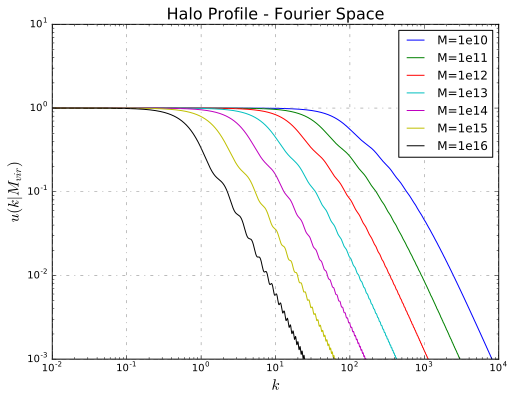

In [58]:
# Making plot
fig14 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig14.add_subplot(111)
ax.plot(k, uk10,label='M=1e10')
ax.plot(k, uk11,label='M=1e11')
ax.plot(k, uk12,label='M=1e12')
ax.plot(k, uk13,label='M=1e13')
ax.plot(k, uk14,label='M=1e14')
ax.plot(k, uk15,label='M=1e15')
ax.plot(k, uk16,label='M=1e16')
ax.set_title('Halo Profile - Fourier Space', fontsize=16)
ax.set_xlabel('$k$', fontsize=15)
ax.set_ylabel('$u(k|M_{vir})$', fontsize=15)
ax.set_yscale('log')
ax.set_ylim(1e-3,1e1)
ax.set_xscale('log')
ax.grid(b=True, which='major', color='grey', linestyle='-.')
# ax.grid(b=True, which='minor', color='k', linestyle='-.')
# ax.annotate('($M, \delta_c$) = ($1.375\\times 10^{12}$, $1.686$)', 
#             xy=(1375670000000, 1.686), xytext=(5000000000000, 1.7),
#             arrowprops=dict(facecolor='black', shrink=0.05, width=2))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
fig14.savefig('halo_profile_fourier_analy.pdf')

In [59]:
'''Calculating the 1-halo term'''
# for k in np.logspace(-3, 1, num=1e4):
rho_m0 = Omega_m * 2.775035823e11
M = np.logspace(1, 16, num=1e4)
dnlnM_int = interpolate.splev(M, dndlnM, der=0)
k = np.array([])
halo1 = np.array([])
for i in np.logspace(-4, 1, num=1e4):
    uk2 = (np.absolute(u(i,M)))**2
    integrand = (M/((rho_m0)**2))*dnlnM_int*uk2
    halo1 = np.append(halo1,scipy.integrate.simps(integrand,M))
    k = np.append(k,i)

In [60]:
'''Import Camb Power Spectrum P_L(k)'''
data2 = pd.read_table('/Users/luizcouto/CAMB-May2016/halo_extend_matterpower.dat', delim_whitespace=True)
data2.columns = ('kh','P','n')

In [135]:
'''Import Camb HALOFIT Power Spectrum P_L(k)'''
data3 = pd.read_table('/Users/luizcouto/CAMB-May2016/halofit_matterpower.dat', delim_whitespace=True)
data3.columns = ('kh','P','n')

In [104]:
'''Calculating the 2-halo term'''
# interpolating the Bias function at z=0
bias_interpol = scipy.interpolate.splrep(M2, bias_z0,s=0)
bias2halo = interpolate.splev(M, bias_interpol, der=0)

k2 = np.array([])
halo2 = np.array([])
for i in np.logspace(-4, 1, num=1e4):
    integrand = (1/rho_m0)*dnlnM_int*u(i,M)*bias2halo
    halo2 = np.append(halo2,scipy.integrate.simps(integrand,M))
    k2 = np.append(k2,i)

# interpolating the Camb Power Spectrum
Pl_interpol = scipy.interpolate.splrep(data2.kh, data2.P,s=0)
PLk = interpolate.splev(k2, Pl_interpol, der=0)

In [132]:
Phalo2 = (halo2**2)*PLk

In [133]:
'''Calculating the total halo model spectrum '''
halo_tot = halo1+(Phalo2)

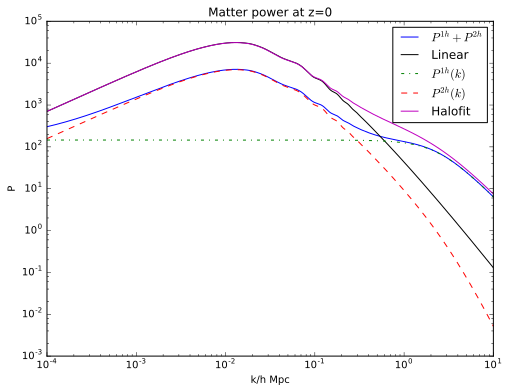

In [162]:
# Making plot of the power spectrum at z=1
fig15 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig15.add_subplot(111)
ax.plot(k2, halo_tot,'b-',label='$P^{1h}+P^{2h}$')
ax.plot(k2, PLk,'k-',label='Linear')
ax.plot(k, halo1,'g-.',label='$P^{1h}(k)$')
ax.plot(k2, Phalo2,'r--',label='$P^{2h}(k)$')
ax.plot(data3.kh, data3.P,'m-',label='Halofit')
ax.set_title('Matter power at z=0')
ax.set_xlabel('k/h Mpc')
ax.set_ylabel('P')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-4,1e1)
# ax.annotate('$X_n = 0.1512$', xy=(1, 1), xytext=(40, 0.15))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
fig15.savefig('matter_power.png')

In [138]:
Phalo2_norm = ((halo2*2.1118712081942874)**2)*PLk
halo_tot_norm = halo1+(Phalo2_norm)

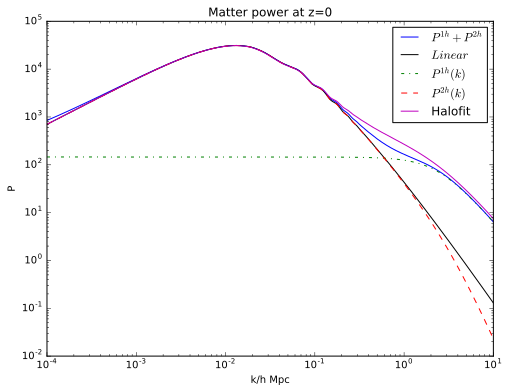

In [164]:
# Making plot of the power spectrum at z=1
fig16 = plt.figure(figsize=(8, 6), dpi=80)
ax = fig16.add_subplot(111)
ax.plot(k2, halo_tot_norm,'b-',label='$P^{1h}+P^{2h}$')
ax.plot(k2, PLk,'k-',label='$Linear$')
ax.plot(k, halo1,'g-.',label='$P^{1h}(k)$')
ax.plot(k2, Phalo2_norm,'r--',label='$P^{2h}(k)$')
ax.plot(data3.kh, data3.P,'m-',label='Halofit')
ax.set_title('Matter power at z=0')
ax.set_xlabel('k/h Mpc')
ax.set_ylabel('P')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-4,1e1)
# ax.annotate('$X_n = 0.1512$', xy=(1, 1), xytext=(40, 0.15))
# ax.invert_xaxis()
ax.legend(loc='best')
plt.show()
fig16.savefig('matter_power_norm.png')

In [2]:
np.zeros(2)

array([ 0.,  0.])